En el apartado "Loading Data" de esta URL:

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

Se explica cómo se cargan una serie de datos: 

1. Utiliza esa misma forma para cargar los datos.
2. Limpia los datos si es necesario
3. Dibuja con plotly los que creas necesarios gráficos para entender los datos.
4. Utiliza los métodos de clasificación vistos hasta ahora para clasificar el target de los datos, ¿cuál da mejores resultados? 
5. Intenta superarte en el score cambiando las features de los algoritmos.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Import function to automatically create polynomial features! 
from sklearn.preprocessing import PolynomialFeatures
# Import Linear Regression

from sklearn import linear_model
from sklearn.svm import SVR
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder

In [2]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

In [3]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
df_ = pd.DataFrame(data=cancer.data, index=None, columns=['mean radius','mean texture','mean perimeter','mean area',
 'mean smoothness', 'mean compactness', 'mean concavity',
 'mean concave points', 'mean symmetry', 'mean fractal dimension',
 'radius error', 'texture error', 'perimeter error', 'area error',
 'smoothness error', 'compactness error', 'concavity error',
 'concave points error', 'symmetry error', 'fractal dimension error',
 'worst radius', 'worst texture', 'worst perimeter', 'worst area',
 'worst smoothness', 'worst compactness', 'worst concavity',
 'worst concave points', 'worst symmetry', 'worst fractal dimension'], dtype=None, copy=False)

In [7]:
df_.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
print("Features: ", cancer.feature_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [15]:
# Una manera de pasar a df incluyendo el target en el mismo
df1 = pd.DataFrame(data= np.c_[cancer['data'], cancer['target']],
                     columns=list(cancer['feature_names']) + ['target'])

In [16]:
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [9]:
# Otra forma de convertirlo a 1 df pero sin el target
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [18]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

No es necesario limpiar el dataframe

Dibuja con plotly los que creas necesarios gráficos para entender los datos.

#### Utiliza los métodos de clasificación vistos hasta ahora para clasificar el target de los datos, ¿cuál da mejores resultados?

Para obtener el conjunto de X y el de y lo podría sacar del dataframe anterior (df), pero en esta ocasion los obtendré de otra manera

In [10]:
X = cancer.data 
y = cancer.target

### - Logistic Regression

In [11]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=1)

In [12]:
# Asigno el modelo
model= linear_model.LogisticRegression(fit_intercept=True, penalty='l2', tol=1e-5, C=0.7, solver='lbfgs',multi_class='auto', warm_start=True)

In [13]:
model.fit(X_train, y_train)

LogisticRegression(C=0.7, tol=1e-05, warm_start=True)

In [14]:
y_predic_LR = model.predict(X_test)

In [15]:
score_RL = model.score(X_test,y_test)
score_RL

0.935672514619883

### - SVM-C

In [16]:
# Creo el modelo
clf = SVC(kernel='linear')

In [17]:
# Lo entreno
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
#Predecir los resultados del conjunto de test
y_pred_SVMC = clf.predict(X_test)

In [44]:
score_SVMC = clf.score(X_test,y_test)
score_SVMC 

0.9532163742690059

### - Random Forest 

In [29]:
k_fold = RepeatedKFold(n_splits=20, n_repeats=1, random_state=1)
val_score = []
train_score = []
# define the model
model_RF = RandomForestClassifier()
#path = "Z:\\Data_Science\\TheBridge\\Content\\Contenido_Curso\\data_science_jun_2020\\week9\\day2\\theory\\"
for i, (train, val) in enumerate(k_fold.split(X_train)):
    print("Iteración:", i+1)
    print("train/índices batch:", train)
    print("batch_size:", len(train))
    print("val:", val)
    print("val_size:", len(val))
    print("batch:", X_train[train])
    # train the model
    model_RF.fit(X_train[train], y_train[train]) # Aquí estoy entrenando con cross validation pq entreno cachito a cachito y me va a dar mejor score
    score_val = model.score(X_train[val], y_train[val])
    val_score.append(score_val)
    score_train = model_RF.score(X_train[train], y_train[train])
    train_score.append(score_train)

 252 253 254 255 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 274 275 276 277 279 280 281 282 283
 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301
 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319
 320 322 323 324 325 326 327 329 331 332 333 334 335 336 337 338 339 340
 341 342 343 344 345 346 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 371 372 373 374 375 376 377 378 379
 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397]
batch_size: 378
val: [ 28  31  32  33  35  48  55  63  99 157 227 256 273 278 321 328 330 347
 369 370]
val_size: 20
batch: [[1.152e+01 1.493e+01 7.387e+01 ... 9.608e-02 2.664e-01 7.809e-02]
 [1.305e+01 1.931e+01 8.261e+01 ... 1.111e-02 2.439e-01 6.289e-02]
 [1.420e+01 2.053e+01 9.241e+01 ... 1.339e-01 2.534e-01 7.858e-02]
 ...
 [1.720e+01 2.452e+01 1.142e+02 ... 1.899e-01 3.313e-01 1.339e-01]
 [1.403e+01 2.125e+01 8.979e+01 ... 7.963e-02 

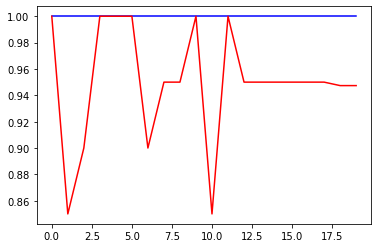

In [30]:
plt.plot(train_score, color="b")
plt.plot(val_score, color="r")

In [32]:
score_RF_KFold = model_RF.score(X_test, y_test)
score_RF_KFold 

0.935672514619883

### - Random Forest (con 3 epoch)

In [35]:
from numpy import mean
from numpy import std
model_batches = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_batches, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
model_batches.fit(X_train, y_train) # Aquí entreno con todos los datos a la vez y el score va a ser peor.
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))# Me da el acierto sobre los valores de validación
score_RF_3KFold = model_batches.score(X_test, y_test)
score_RF_3KFold

Accuracy: 0.953 (0.038)


0.9473684210526315

### - XGBost


In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder

EL conjunto de datos ha sido partido al inicio del ejercicio

In [38]:
model_XGB = XGBClassifier() 
model_XGB.fit(X_train, y_train) 
#Make predictions for test data 
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [39]:
score_XGB = model_XGB.score(X_test, y_test)
score_XGB

0.9415204678362573

Resumen de los scores obtenidos con cada método

In [45]:
d = {'Método': ['Logistic Regression', 'SVMC', 'RandomForest (KFold)', 'RandomForest (R_KFold)','xgboost'], 'Score': [score_RL, score_SVMC, score_RF_KFold, score_RF_3KFold, score_XGB]}
Scores = pd.DataFrame(data=d)
Scores

,Método,Score
0,Logistic Regression,0.935673
1,SVMC,0.953216
2,RandomForest (KFold),0.935673
3,RandomForest (R_KFold),0.947368
4,xgboost,0.941520


El método con mejor score ha sido SVM-C